In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


### Load trained model

In [3]:
import shutil

shutil.copy('/content/drive/MyDrive/A.N Lab/model-classifier1.h5', 'model-classifier1.h5')

'model-classifier1.h5'

In [4]:
from tensorflow import keras

model = keras.models.load_model('/content/model-classifier1.h5')

### Preprocess link ảnh đầu vào: chuyển đổi ảnh sang chế độ màu RGB và numpy array, sau đó chuyển sang float để có thể lấy làm input để predict


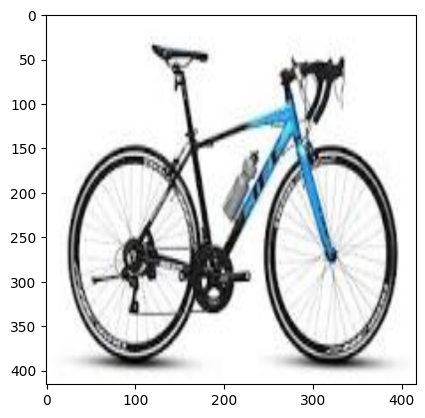

In [5]:
import requests
import numpy as np
import cv2
import matplotlib.pyplot as plt
from io import BytesIO

image_url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTaS8yt8vyyd0-_H4j8NIIpzGiqYGwSpYKp2V91bPddEQ&s"

response = requests.get(image_url)
image = np.asarray(bytearray(response.content), dtype="uint8")
image = cv2.imdecode(image, cv2.IMREAD_COLOR)

resized_image = cv2.resize(image, (416, 416))

image_rgb = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)
image_array = np.array(image_rgb)

image_float = image_array.astype('float32') / 255.0

plt.imshow(image_float)
plt.show()

### Prediction

In [6]:
y_pred = model.predict(np.expand_dims(image_float, axis=0))
print(y_pred)

1/1 [==============================] - 0s 366ms/step
[[0.81093377 0.1933338 ]]


In [7]:
# tạo LabelEncoder để đảo ngược về giá trị gốc
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(["Motor", "Bycycle"])

Text(0.5, 1.0, "['Bycycle']")

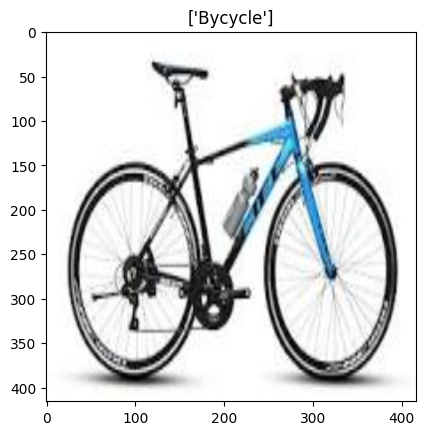

In [8]:
plt.imshow(image_float, cmap = plt.cm.binary)
plt.title(label_encoder.inverse_transform(np.argmax(y_pred, axis = 1)))